**Modern Portfolio Theory (MPT)**

This notebook is a quick illustration of how Empyrial can be used for obtaining the optimal allocations.

In the example below, we pick some stocks and benchmark it against the S&P500. We are using SPY as it's the next-alternative 

(as opposed to trying to come up with our own allocations).



In [1]:
# !pip install empyrial

In [2]:
from empyrial import empyrial, Engine
import pandas as pd

**Parameter values:** <1>
* start_date = 2020-01-01; it's discretionary (Note 1)
* portfolio = List of string of symbols. Here, it's just a selection of large caps. 
* optimizer = "MINVAR" - Applying MPT with objective to minimize portfolio variance
* rebalance = once per quarter

Note 1: For "start_date" - Although academic studies suggest 12-months is the ideal lookback period for backtesting, the choice of it may rather be arbitrary. It can be argued that trying to find a best fitted start-end date for strategies over historical data may be counter productive. <2> 

In [3]:
date_today = pd.to_datetime('today').strftime("%Y-%m-%d")
date_2yrs_ago = pd.to_datetime(date_today) - pd.DateOffset(months=25)
date_2yrs_ago = date_2yrs_ago.strftime("%Y-%m-%d")
date_2yrs_ago

'2021-09-10'

In [4]:
portfolio = Engine(
    start_date = date_2yrs_ago,                                      
    portfolio = ["AAPL","JNJ","KO","MRK","PFE","PM","TSM", "MSFT", "MCD", "TSLA", "XOM", "LMT"],
    benchmark = ["SPY"],
    optimizer = "MINVAR", 
    rebalance = "monthly"
)

# Summary:

Start date: 2021-09-10
End date: 2023-10-10


,Backtest
,
Annual return,9.47%
Cumulative return,20.62%
Annual volatility,14.7 %
Winning day ratio,52.49%
Sharpe ratio,0.69
Calmar ratio,0.74
Information ratio,0.0
Stability,0.69
Max Drawdown,-12.73 %


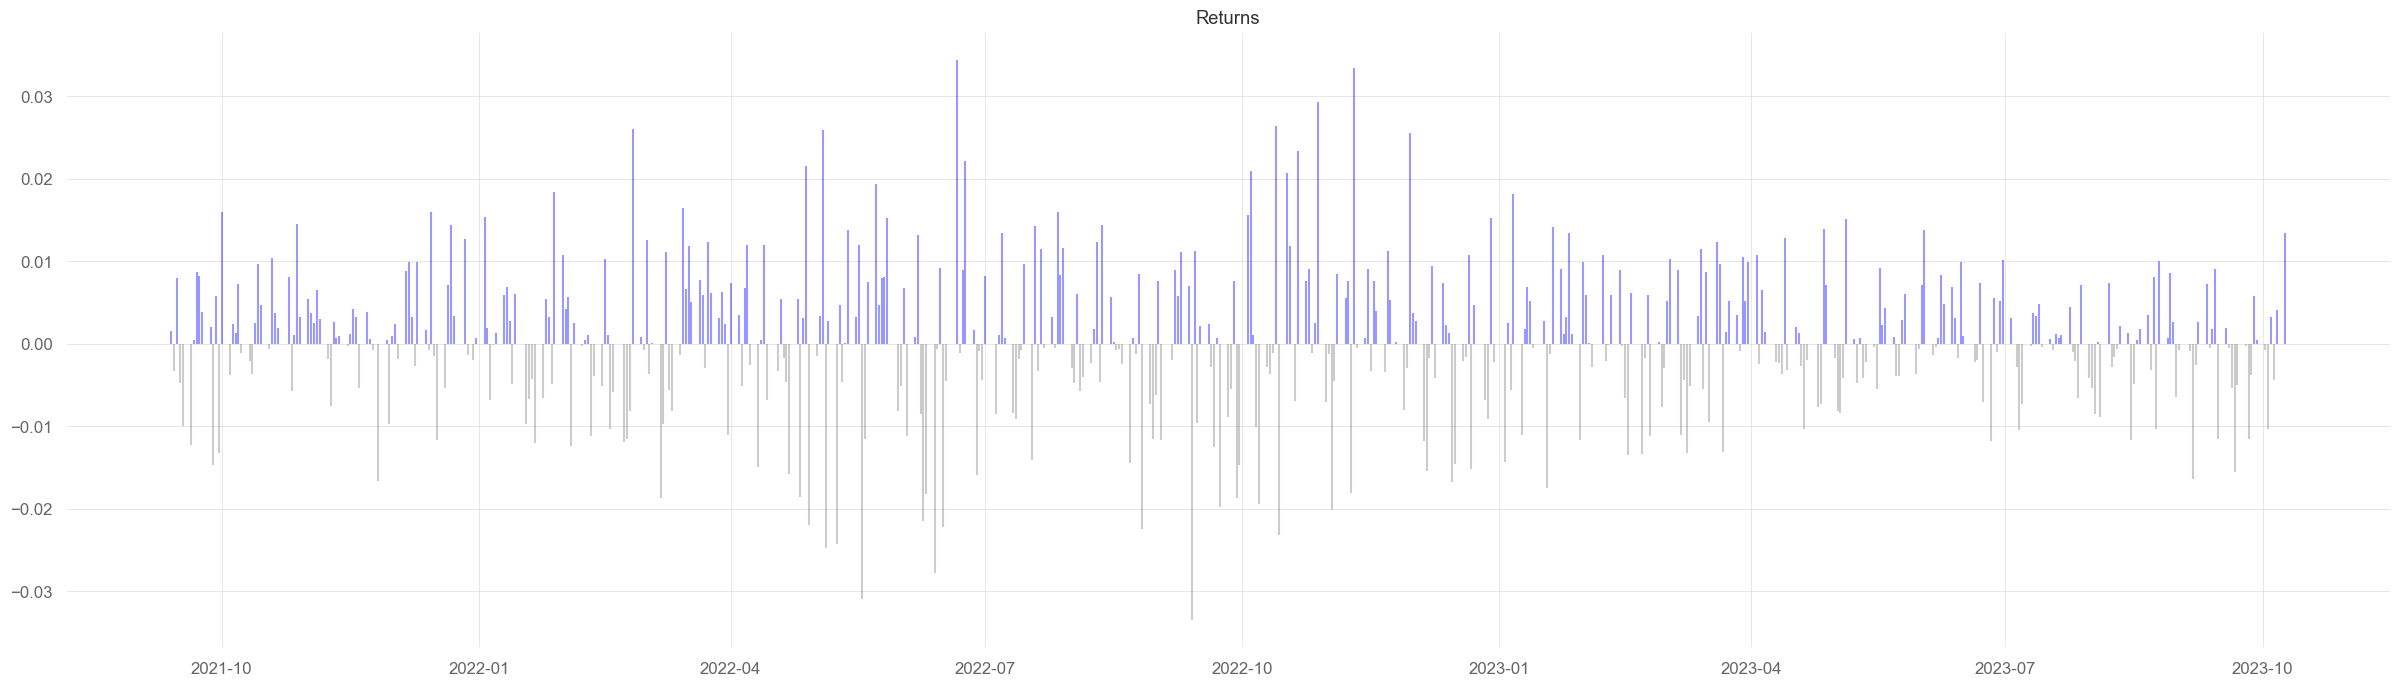

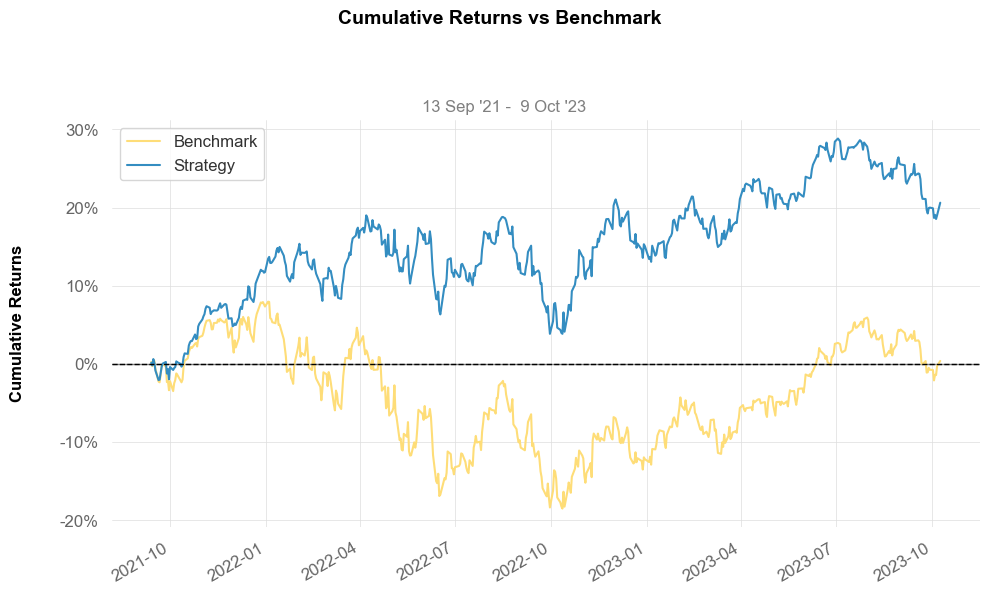

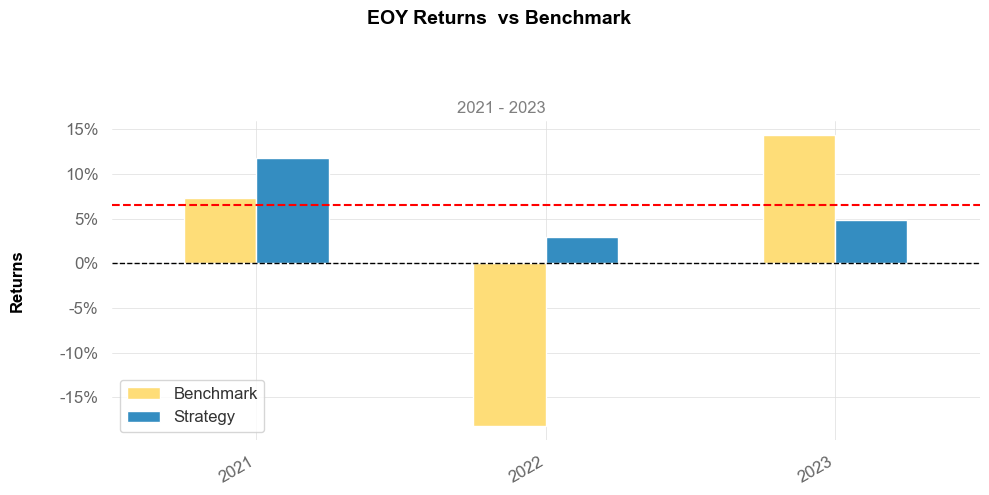

TypeError:  pivot() takes 1 positional argument but 4 were given


In [5]:
try:
    empyrial(portfolio)
except TypeError as e:
    print("TypeError: ", e)

# Summary of allocations

In [6]:
df_alloc = empyrial.orderbook
print("Hypothetical allocations over time: ")
df_alloc

Hypothetical allocations over time: 


,2021-10-10,2021-11-09,2021-12-10,2022-01-09,2022-02-09,2022-03-11,2022-04-10,2022-05-11,2022-06-10,2022-07-11,...,2023-01-09,2023-02-09,2023-03-11,2023-04-10,2023-05-11,2023-06-10,2023-07-11,2023-08-10,2023-09-10,2023-10-10
AAPL,0.08095,0.08279,0.08224,0.08024,0.07824,0.07754,0.07740,0.07428,0.07149,0.07168,...,0.06850,0.06932,0.06979,0.07033,0.07052,0.07114,0.07162,0.07203,0.07210,0.07258
JNJ,0.08969,0.08668,0.08770,0.08953,0.09068,0.09027,0.09015,0.09234,0.09325,0.09423,...,0.09614,0.09584,0.09529,0.09476,0.09470,0.09442,0.09411,0.09373,0.09365,0.09356
KO,0.08589,0.08565,0.08478,0.08643,0.08774,0.08756,0.08772,0.08969,0.08800,0.08975,...,0.09058,0.09062,0.09061,0.09067,0.09079,0.09059,0.09054,0.09030,0.09036,0.09020
MRK,0.08087,0.08229,0.08231,0.08512,0.08567,0.08638,0.08665,0.08836,0.09077,0.09094,...,0.09400,0.09416,0.09357,0.09314,0.09306,0.09281,0.09246,0.09223,0.09189,0.09189
PFE,0.08856,0.08512,0.09100,0.09312,0.09214,0.08994,0.08977,0.09044,0.09078,0.08960,...,0.08913,0.08944,0.08923,0.08916,0.08910,0.08912,0.08870,0.08855,0.08836,0.08848
PM,0.07999,0.08393,0.08494,0.08632,0.08757,0.08637,0.08579,0.08962,0.09127,0.09183,...,0.09061,0.09065,0.09041,0.09030,0.08988,0.08976,0.08985,0.08961,0.08953,0.08933
TSM,0.08277,0.08325,0.08184,0.07794,0.07654,0.07580,0.07599,0.07420,0.07490,0.07526,...,0.07454,0.07480,0.07492,0.07536,0.07587,0.07582,0.07600,0.07618,0.07628,0.07642
MSFT,0.07904,0.08296,0.08200,0.08098,0.08007,0.07954,0.07933,0.07681,0.07596,0.07615,...,0.07288,0.07262,0.07286,0.07363,0.07426,0.07459,0.07473,0.07494,0.07532,0.07547
MCD,0.08535,0.08499,0.08439,0.08610,0.08715,0.08739,0.08688,0.08729,0.08747,0.08932,...,0.09159,0.09145,0.09131,0.09115,0.09108,0.09081,0.09066,0.09045,0.09045,0.09017
TSLA,0.08236,0.07561,0.07250,0.06535,0.06217,0.06070,0.06028,0.05681,0.05540,0.05190,...,0.05311,0.05256,0.05324,0.05370,0.05369,0.05425,0.05458,0.05526,0.05556,0.05594


In [7]:
print("But only want the allocation as of today: ") 
df_alloc_today = pd.DataFrame(df_alloc.iloc[:,-1])
df_alloc_today

But only want the allocation as of today: 


,2023-10-10
AAPL,0.07258
JNJ,0.09356
KO,0.09020
MRK,0.09189
PFE,0.08848
PM,0.08933
TSM,0.07642
MSFT,0.07547
MCD,0.09017
TSLA,0.05594


---
References:

<1> Quick guide on how to set the parameter [https://empyrial.gitbook.io/empyrial/quickstart](https://empyrial.gitbook.io/empyrial/quickstart)

<2> Toma Hentea; Feb. 2019; "Optimal Lookback Period For Momentum Strategies" [Article from seekingalpha](https://seekingalpha.com/article/4240540-optimal-lookback-period-for-momentum-strategies )